# **Deep Learning and CNN for Computer Vision, Hokkaido University**

## Day 2, Notebook -1: Image CLassification using CNN


In this session you will be implementing Convolutional Neural Network for Fashion MNIST dataset classification.

So lets get started!

## Tasks for this notebook:

1. Implementation of a CNN for Dogs and Cats classification using Keras API.
2. Train and test model


### Step 1: Import required packages

We will need tensorflow, numpy, os and keras


In [1]:
import tensorflow as tf
import os
import numpy as np
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import h5py
import glob
import cv2
import keras.utils as image
from tensorflow import keras

### Step 2: Download the Fashion Mnist dataset using keras

In [2]:
fashionMnist=tf.keras.datasets.fashion_mnist

In [3]:
# Load data from fashion mnist dataset using the load_data() method.
(train_images, train_labels), (test_images, test_labels) = fashionMnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Display the shapes of the training images
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [5]:
#define the class names for the fashion mnist dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

3


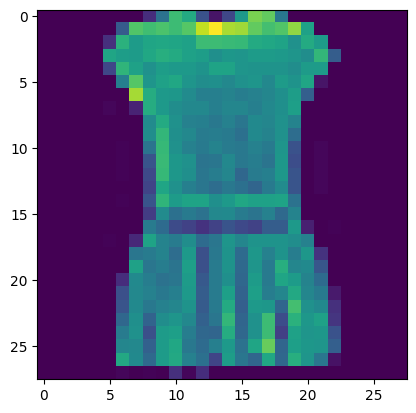

In [6]:
## Display an image from the dataset
import matplotlib.pyplot as plt
plt.imshow(train_images[3])
print(train_labels[3])

**Note :** Scikit-learn import the Fashion MNIST dataset as a 1-D array while Keras API load the dataset in 28X28 format.

### Step 3: Normalize the dataset and split a small part of the training set into validation set


- Validation set: first 5000 samples (total 5000 samples)
- Training set: 5000 to remaining (total 55000 samples)

In [7]:
## Using slicing to split the training to train and validation

train_images=train_images.reshape(60000, 28, 28, 1)
valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]

train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0


In [8]:
# Print the shapes for Train, Validation, and Test dataset.
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28, 1)
(5000, 28, 28, 1)
(10000, 28, 28, 1)


[**Expected** Output]

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)

### Step 4:  Design the CNN Architecture

Design the following CNN architecture:

<img src='http://drive.google.com/uc?export=view&id=1KBmj460idGx6mWbAKsH1bsEYmjpthdPB' alt='Conv'>


Input: $64 X 64 X 3$ image

Activation function in CONV layer: Relu

Activation function in Output layer : softmax, 10 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()



In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Notes:**
* **Sequential model.** This is the simplest kind of Keras model, for neural networks which defines a SEQUENCE of layers.

* **Flatten.** Flatten just takes that image and turns it into a 1-dimensional vector.

* Next we add a second Dense hidden layer with 128 neurons, also using the ReLU activation function.  **Dense.** Add a layer to the neural network which is followed by activation function of ReLU. The ReLU only passes the value greater than 0 and for all other values of X it passes 0.
e.g. If X>0 return X, else return 0"

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function.

* **Softmax** The softmax takes a set of values and select the biggest one from the set of values.

## Step 5: Training the model

**"sparse_categorical_crossentropy":**   The dataset contains sparse labels and the classes are exclusive.

**One-hot vector encoding** This is sometime used for encoding the labels if there one target  probability per class for each instance. For example.
[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.] represent one-hot encoding for class 4. In such case, **"categorical_crossentropy"** loss is used.

**"sigmoid_crossentropy"** This loss is used for binary class classification problems and also **"sigmoid"** activation function is used instead of Softmax.



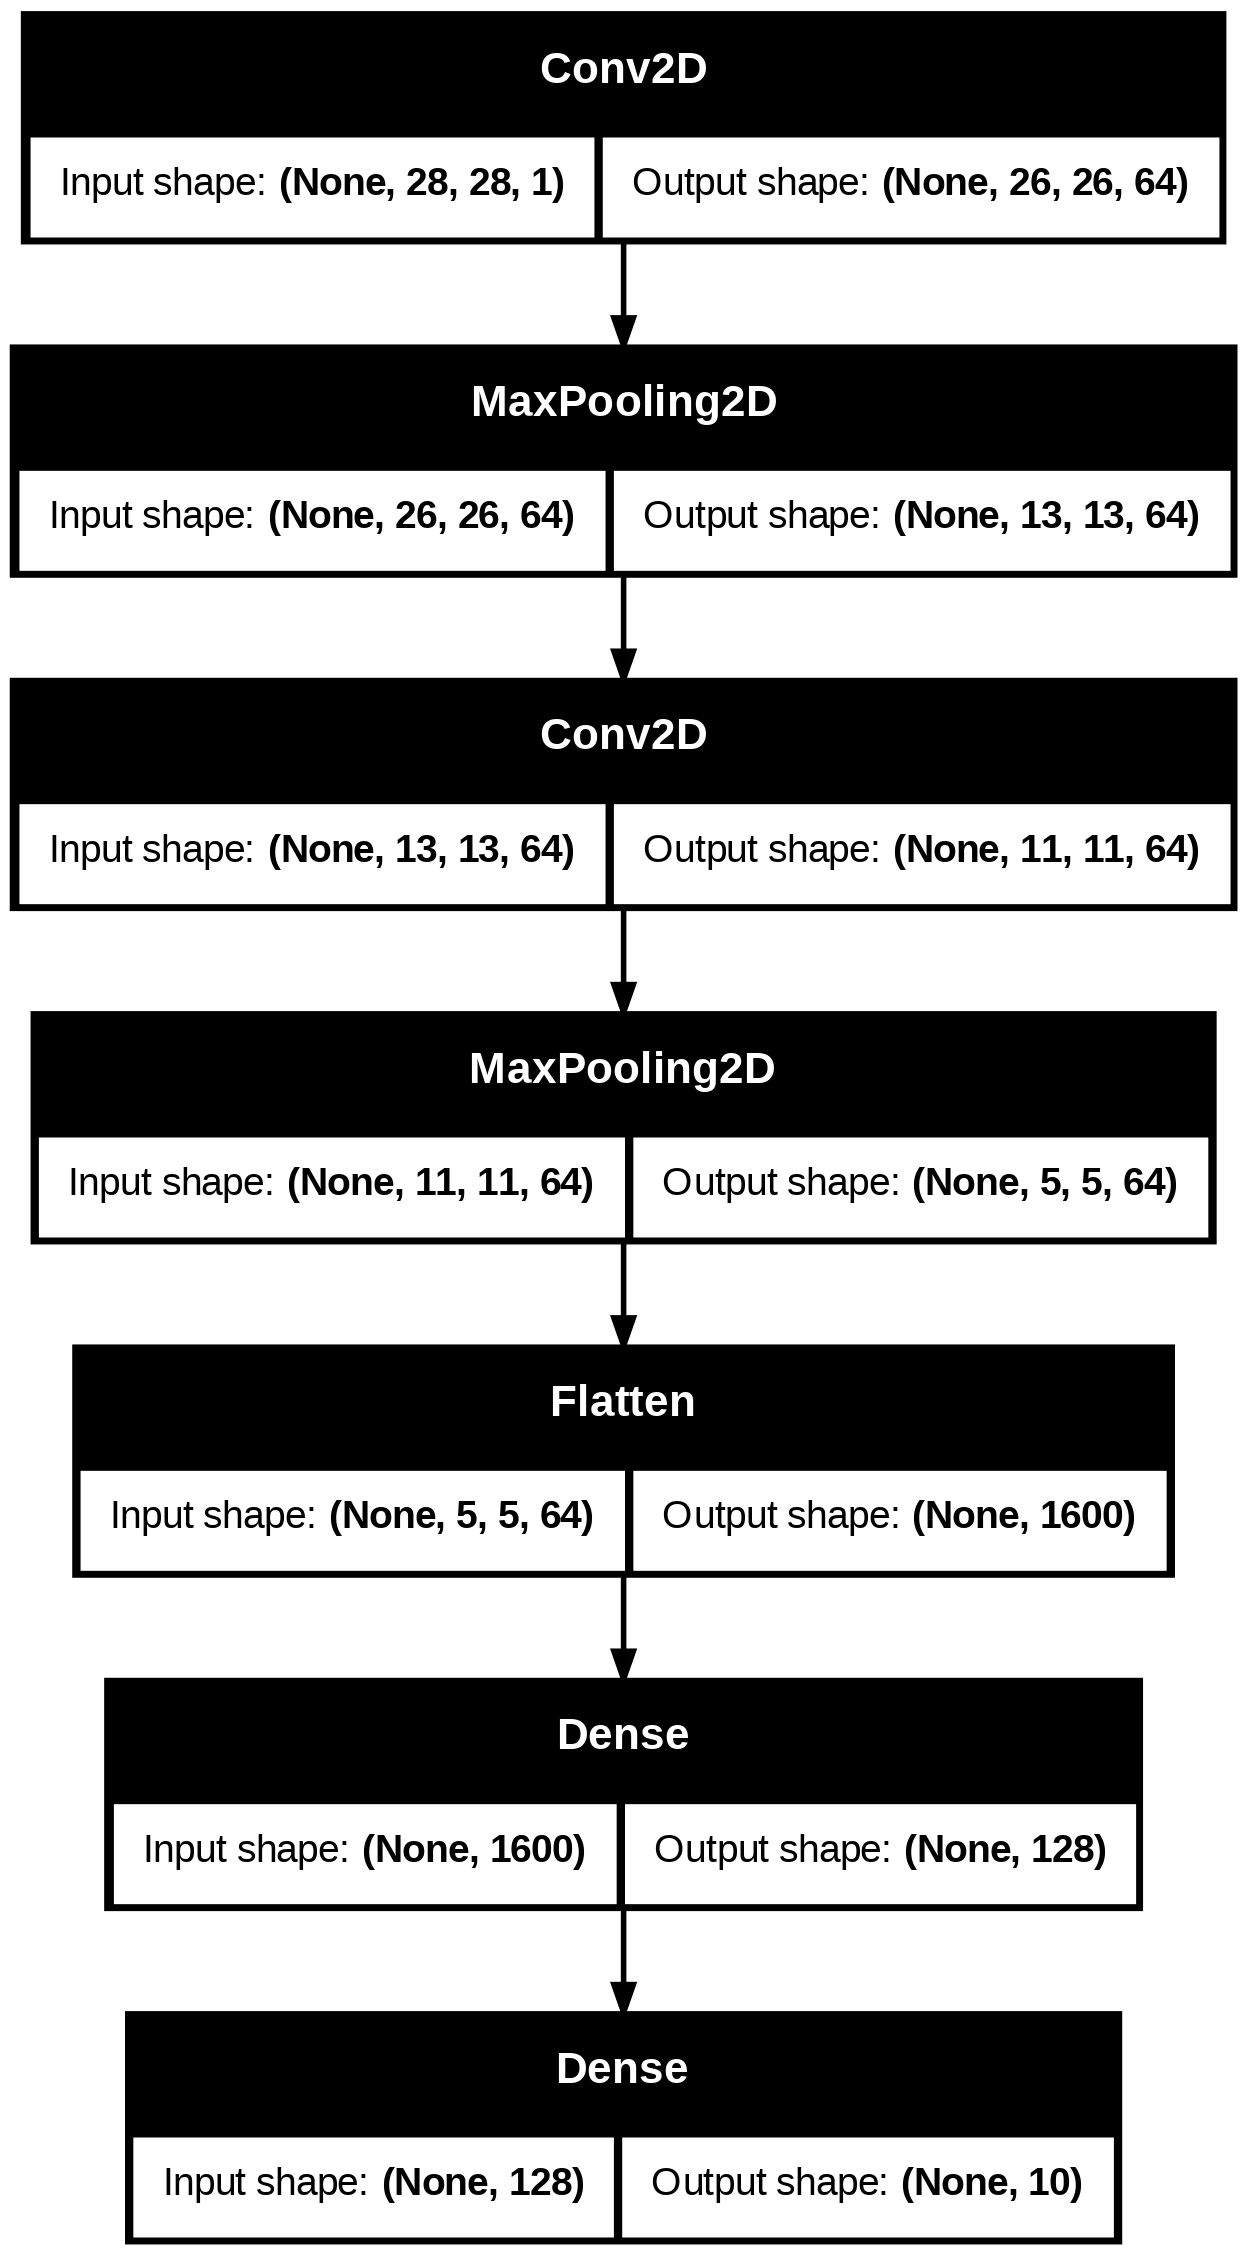

In [10]:
# Using Plot_Model from Keras.Utils
model_img_file = 'CNN-model1.png'
tf.keras.utils.plot_model(model, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=False,
                          show_dtype=False,
                          show_layer_names=False )

# Also Try:
# show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True

In [11]:
# Compile the model and start training the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=5)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7800 - loss: 0.6127
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8893 - loss: 0.3045
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9085 - loss: 0.2488
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9202 - loss: 0.2132
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9281 - loss: 0.1925


In [12]:
# Process the test images and find the accuracy
test_loss = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9017 - loss: 0.3061


### Summary of the model

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)

## Step 6: Evaluation on test dataset

In [14]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9017 - loss: 0.3061


[0.2947167158126831, 0.9004999995231628]

## Task: Image classification using Cats and Dogs Dataset.

###  Step: 1 Mount the Google Drive to access the Cats and Dogs Dataset
Reference: https://github.com/ardamavi/Dog-Cat-Classifier



In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
cd /content/gdrive/MyDrive/Hokkaido Uni DL/Day-2

/content/gdrive/MyDrive/Hokkaido Uni DL/Day-2


In [17]:
!unzip Cats-Dogs-dataset-64.zip
!ls

Archive:  Cats-Dogs-dataset-64.zip
replace TestData/cat/cat.282.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
 Cats-Dogs-dataset-64.zip
 CNN-model2.png
 Day2-NB1-ImageClassification-CNN.ipynb
 TestData
 TrainData
'Week6-Avoid Overfitting Using Regularization Approaches-Solution.ipynb'


### Step : 2 Image Generators: (Preparing the dataset for train, validation and testing)

In Keras  **keras.preprocessing.image.ImageDataGenerator** class  can be used to read images and extract labels from them via .flow_from_directory. The image generator can also be used for data augmentation. The image generators can used easily with Keras model that accept data generators as inputs. such as fit_generator, evaluate_generator, and predict_generator.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Hokkaido Uni DL/Day-2',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64X64
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Hokkaido Uni DL/Day-2',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64X64
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


### Step 3: Create the CNN model:

Create the following CNN model:

<img src='http://drive.google.com/uc?export=view&id=1EAWFwp7T92q3Lm1ZrX9A2-wnvhfAfzSF' alt='Conv'>

Input: $64 X 64 X 3$ image

Activation function in CONV layer: Relu

Activation function in Output layer : sigmoid, 2 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()

In [19]:
## WRITE YOUR CODE HERE ## (~11 lines)
model1 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

## END YOUR CODE HERE ##

In [20]:
##Print the model summary
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192,609 (752.38 KB)

 Trainable params: 192,609 (752.38 KB)

 Non-trainable params: 0 (0.00 B)

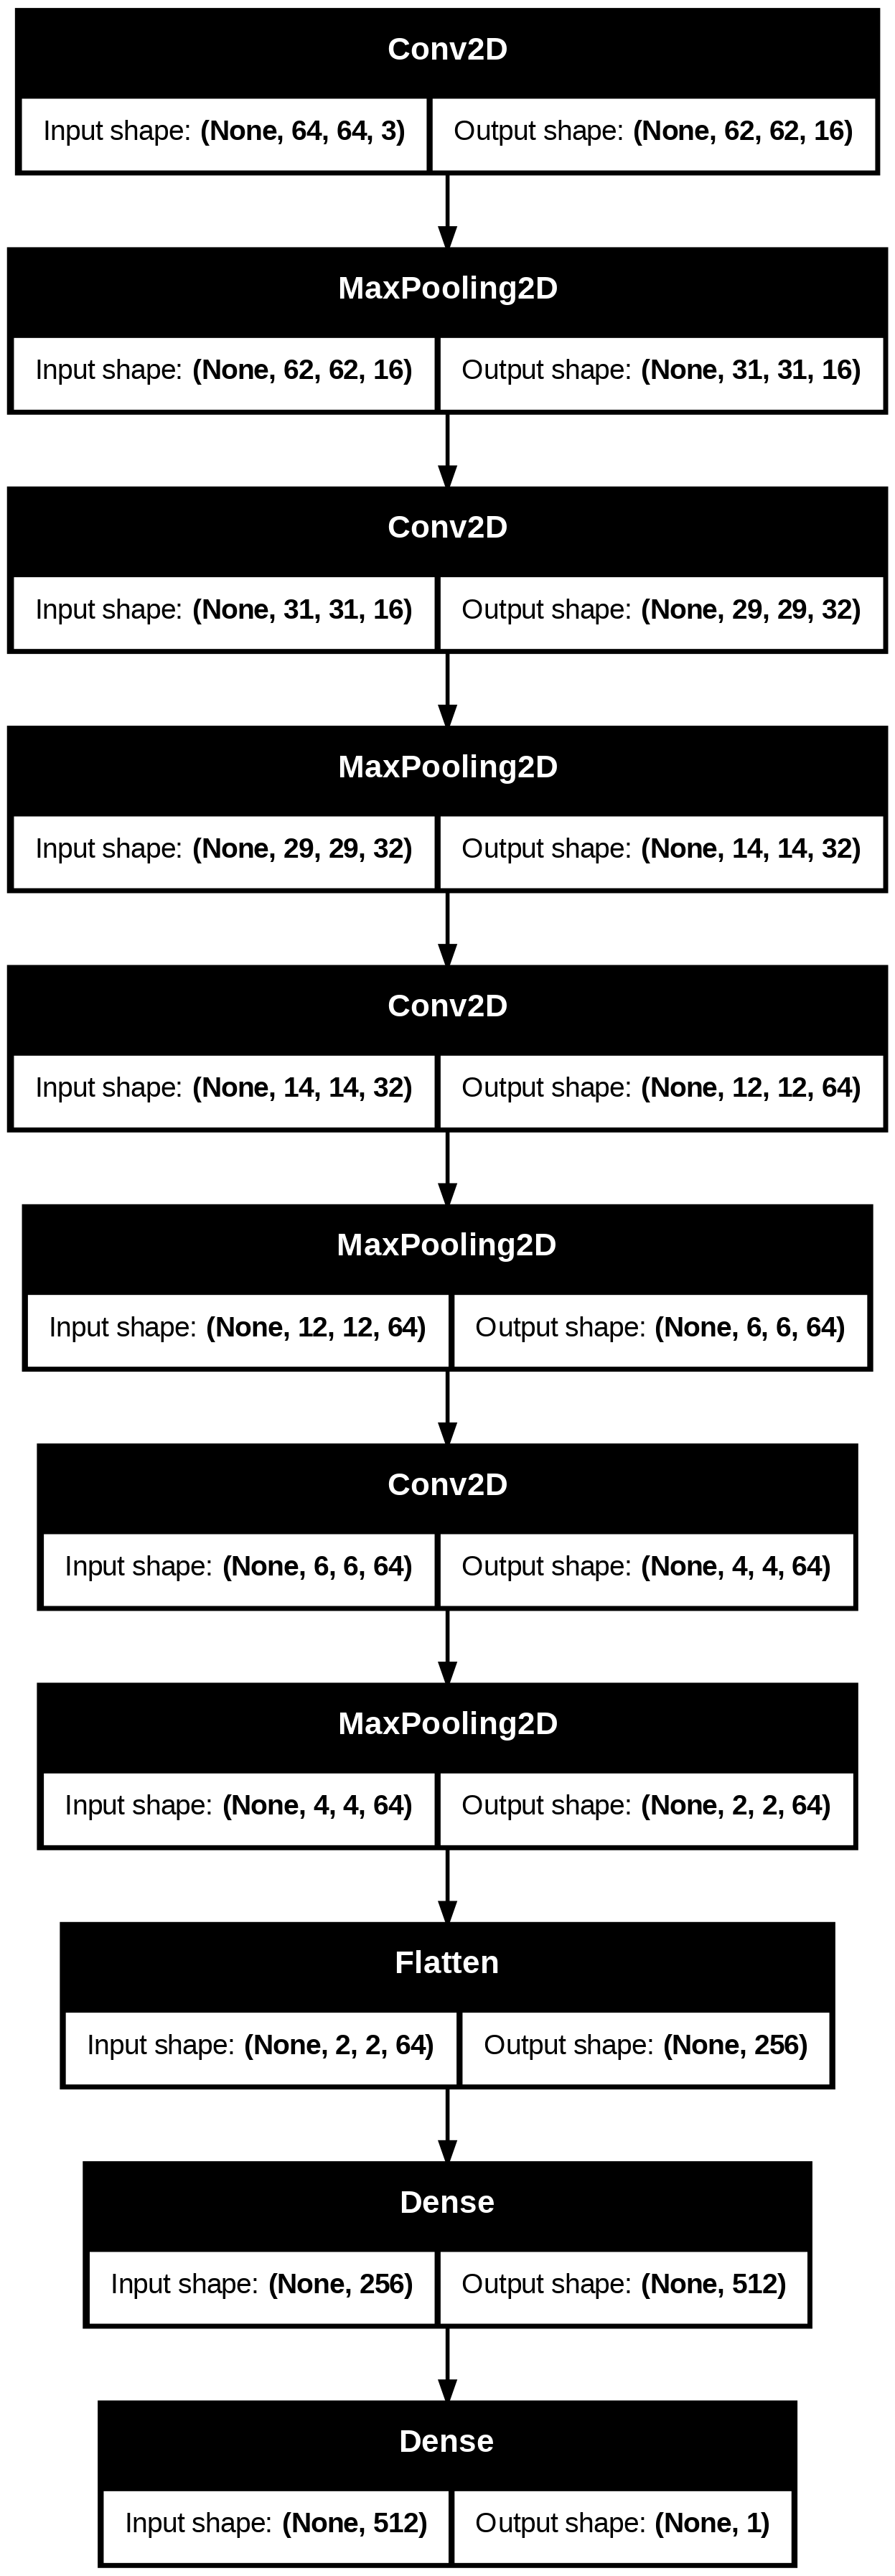

In [21]:
# Using Plot_Model from Keras.Utils
model_img_file = 'CNN-model2.png'
tf.keras.utils.plot_model(model1, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=False,
                          show_dtype=False,
                          show_layer_names=False )

# Also Try:
# show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True

In [22]:
## Compile the model and add loss, optimizer and metrics
## WRITE YOUR CODE HERE ## (~1 line)
model1.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])


In [23]:
# Train/fit the model using the training and validation set.
## WRITE YOUR CODE HERE ## (~ 1 line)
history = model1.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 6s/step - acc: 0.7899 - loss: 0.5898 - val_acc: 0.8208 - val_loss: 0.5666
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step - acc: 0.8239 - loss: 0.5330 - val_acc: 0.8542 - val_loss: 0.4262
Epoch 3/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9667 - loss: 0.2772

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - acc: 0.8465 - loss: 0.4566 - val_acc: 0.7917 - val_loss: 0.5287
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - acc: 0.8822 - loss: 0.3719 - val_acc: 0.8250 - val_loss: 0.4705
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - acc: 0.8158 - loss: 0.4833 - val_acc: 0.8667 - val_loss: 0.4578
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.8583 - loss: 0.4407 - val_acc: 0.8583 - val_loss: 0.4100
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - acc: 0.8307 - loss: 0.4625 - val_acc: 0.8292 - val_loss: 0.4616
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - acc: 0.8084 - loss: 0.5026 - val_acc: 0.8333 - val_loss: 0.4527
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - acc: 0.8753 - loss: 0.4068 - val_acc: 0.8917 - val_loss: 0.3473
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - acc: 0.8474 - loss: 0.4298 - val_acc: 0.8458 - val_loss: 0.4350
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - acc: 0.8285 - loss: 0.4652 - va

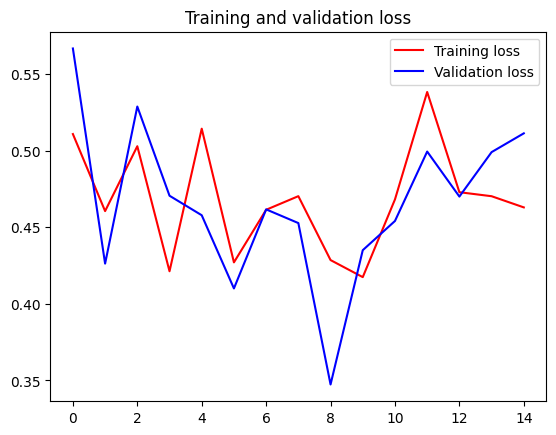

In [24]:
## Plot the Training and Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



### Clearing all the resources

Terminate the kernel and free memory resources

In [ ]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)